In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR="/mnt/Archivos/data"

In [3]:
from eapprocessor.tools.load import load_neo, load_count_evaluation, get_evaluation_files

In [4]:
noise_levels = [5, 25, 50]
resolutions = [12,10,9,8,7,6]
neofolders = [
    f"{BASE_DIR}/output/preprocessor",
    f"{BASE_DIR}/output-bw-300-3000/preprocessor",
    f"{BASE_DIR}/output-bw-300-1000/preprocessor"
]
fs=20000

In [5]:
neo_list=[]
neo_files=[]
for neofolder in neofolders:
    neo_list_bw = []
    neo_files_bw = []
    for resolution in resolutions:
        neo_list_resolution = []
        neo_files_resolution =[]
        for noise_level in noise_levels:
            neo_dict, file = load_neo(neofolder, verbose=True, resolution=resolution, 
                               noise_level=noise_level, fs=fs)
            neo_list_resolution += [neo_dict]
            neo_files_resolution += [file]

        neo_list_bw += [neo_list_resolution]
        neo_files_bw += [neo_files_resolution]
    neo_list += [neo_list_bw]
    neo_files += [neo_files_bw]

Search for pattern: *_12_5uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-04_12-19.h5
Search for pattern: *_12_25uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-04_12-20.h5
Search for pattern: *_12_50uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_50uV_20000Hz_2021-10-04_12-20.h5
Search for pattern: *_10_5uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_10_5uV_20000Hz_2021-11-04_16-18.h5
Search for pattern: *_10_25uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_10_25uV_20000Hz_2021-11-04_16-18.h5
Search for pattern: *_10_50uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_10_50uV_20000Hz_2021-11-04_16-18.h5
Search for pattern: *_9_5uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_9_5uV_20000Hz_2021-11-04_16-18.h5


In [6]:
spiketrain_obj_list = neo_list[0][0][0]["recordings"].spiketrains

In [7]:
import numpy as np

In [8]:
spiketrain_list = [np.array(spiketrain[:]) for spiketrain in spiketrain_obj_list]

In [9]:
timestamps = neo_list[0][0][0]["recordings"].timestamps[:]
print(timestamps)

[0.00000e+00 5.00000e-05 1.00000e-04 ... 9.99985e+00 9.99990e+00
 9.99995e+00]


In [10]:
from eapprocessor.evaluator.spikes import estimate_sample_spikes, comparison_detection_spiketrain

In [11]:
indexes_list = []
errors_list = []
for spiketrain in spiketrain_list:
    indexes, errors = estimate_sample_spikes(spikes=spiketrain,timestamps=timestamps)
    indexes_list += [indexes]
    errors_list += [errors]

In [12]:
import matplotlib.pylab as plt

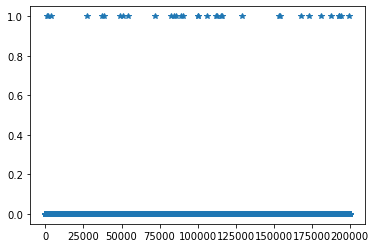

In [13]:
plt.plot(indexes_list[0],'*')

In [14]:
only_spikes = timestamps[indexes_list[0]>0]

In [15]:
only_spikes

array([0.06305, 0.09835, 0.1747 , 1.3578 , 1.8715 , 1.92955, 2.45075,
       2.5493 , 2.7232 , 3.58895, 4.11255, 4.2386 , 4.2979 , 4.4432 ,
       4.5327 , 5.0213 , 5.026  , 5.30705, 5.5919 , 5.6261 , 5.77415,
       5.78555, 6.46585, 7.68395, 7.70295, 8.3836 , 8.64825, 9.06565,
       9.3717 , 9.63995, 9.6463 , 9.71885, 9.9609 ])

In [16]:
shifted = np.roll(only_spikes,1)

In [17]:
diff = only_spikes[1:]-shifted[1:]

In [18]:
diff

array([0.0353 , 0.07635, 1.1831 , 0.5137 , 0.05805, 0.5212 , 0.09855,
       0.1739 , 0.86575, 0.5236 , 0.12605, 0.0593 , 0.1453 , 0.0895 ,
       0.4886 , 0.0047 , 0.28105, 0.28485, 0.0342 , 0.14805, 0.0114 ,
       0.6803 , 1.2181 , 0.019  , 0.68065, 0.26465, 0.4174 , 0.30605,
       0.26825, 0.00635, 0.07255, 0.24205])

In [19]:
diff.min()

0.004699999999999704

In [20]:
dt = timestamps[1] - timestamps[0]
dt

5e-05

In [21]:
window= 2.5e-3
N_samples = int(window/dt)

In [22]:
N_samples

50

In [23]:
original_range = np.arange(len(timestamps))
original_range

array([     0,      1,      2, ..., 199997, 199998, 199999])

In [24]:
test_indexes = original_range[indexes_list[7]>0]
test_indexes

array([  1424,   2882,   3132,   5024,   5286,   6493,   7274,   7760,
         8008,   8224,   8315,   9283,  11782,  15010,  16657,  17468,
        19400,  20039,  22239,  26411,  26580,  28435,  29184,  31621,
        36541,  36971,  37071,  38817,  38975,  40845,  42464,  43313,
        44393,  45187,  46616,  46918,  50792,  51537,  52166,  53647,
        54899,  58531,  59071,  59675,  60301,  60481,  61074,  63289,
        63998,  64570,  69882,  82707,  83405,  84498,  87501,  87678,
        88882,  91926,  94420,  97292,  97382,  99322, 104928, 106976,
       107870, 108264, 113564, 114447, 116588, 118481, 121612, 126406,
       127482, 127675, 129094, 135712, 136677, 139567, 140543, 143365,
       143807, 144705, 146932, 148653, 151139, 156447, 157247, 161081,
       161478, 161589, 162053, 164623, 165423, 166901, 167370, 168349,
       168687, 169479, 172863, 176150, 180925, 181808, 188652, 189770,
       193327, 194219, 194872, 196617, 198713])

In [25]:
slices = []
codes = []
for test_index in test_indexes:
    lower_limit = test_index-int(N_samples/2)
    upper_limit = test_index+int(N_samples/2)
    if lower_limit <0:
        lower_limit = 0
    if upper_limit >= 200000:
        upper_limit = 199999    
    slices.append([lower_limit,upper_limit])
slices

[[1399, 1449],
 [2857, 2907],
 [3107, 3157],
 [4999, 5049],
 [5261, 5311],
 [6468, 6518],
 [7249, 7299],
 [7735, 7785],
 [7983, 8033],
 [8199, 8249],
 [8290, 8340],
 [9258, 9308],
 [11757, 11807],
 [14985, 15035],
 [16632, 16682],
 [17443, 17493],
 [19375, 19425],
 [20014, 20064],
 [22214, 22264],
 [26386, 26436],
 [26555, 26605],
 [28410, 28460],
 [29159, 29209],
 [31596, 31646],
 [36516, 36566],
 [36946, 36996],
 [37046, 37096],
 [38792, 38842],
 [38950, 39000],
 [40820, 40870],
 [42439, 42489],
 [43288, 43338],
 [44368, 44418],
 [45162, 45212],
 [46591, 46641],
 [46893, 46943],
 [50767, 50817],
 [51512, 51562],
 [52141, 52191],
 [53622, 53672],
 [54874, 54924],
 [58506, 58556],
 [59046, 59096],
 [59650, 59700],
 [60276, 60326],
 [60456, 60506],
 [61049, 61099],
 [63264, 63314],
 [63973, 64023],
 [64545, 64595],
 [69857, 69907],
 [82682, 82732],
 [83380, 83430],
 [84473, 84523],
 [87476, 87526],
 [87653, 87703],
 [88857, 88907],
 [91901, 91951],
 [94395, 94445],
 [97267, 97317],
 [97

In [65]:
#Testing included function
from eapprocessor.tools.slices import get_slices_from_indexes

In [66]:
get_slices_from_indexes(test_indexes,N_samples,(0,199999))

[[1399, 1449],
 [2857, 2907],
 [3107, 3157],
 [4999, 5049],
 [5261, 5311],
 [6468, 6518],
 [7249, 7299],
 [7735, 7785],
 [7983, 8033],
 [8199, 8249],
 [8290, 8340],
 [9258, 9308],
 [11757, 11807],
 [14985, 15035],
 [16632, 16682],
 [17443, 17493],
 [19375, 19425],
 [20014, 20064],
 [22214, 22264],
 [26386, 26436],
 [26555, 26605],
 [28410, 28460],
 [29159, 29209],
 [31596, 31646],
 [36516, 36566],
 [36946, 36996],
 [37046, 37096],
 [38792, 38842],
 [38950, 39000],
 [40820, 40870],
 [42439, 42489],
 [43288, 43338],
 [44368, 44418],
 [45162, 45212],
 [46591, 46641],
 [46893, 46943],
 [50767, 50817],
 [51512, 51562],
 [52141, 52191],
 [53622, 53672],
 [54874, 54924],
 [58506, 58556],
 [59046, 59096],
 [59650, 59700],
 [60276, 60326],
 [60456, 60506],
 [61049, 61099],
 [63264, 63314],
 [63973, 64023],
 [64545, 64595],
 [69857, 69907],
 [82682, 82732],
 [83380, 83430],
 [84473, 84523],
 [87476, 87526],
 [87653, 87703],
 [88857, 88907],
 [91901, 91951],
 [94395, 94445],
 [97267, 97317],
 [97

In [26]:
lower_limit = 0
n_slices = []
code =[]
for c_slice in slices:
    upper_limit = c_slice[0]-1
    estimate_number_slices = int(round((upper_limit - lower_limit)/N_samples))
    if (estimate_number_slices>0):
        actual_number_samples = int(round((upper_limit - lower_limit)/estimate_number_slices))
        for i in range(estimate_number_slices-1):
            n_slices.append([lower_limit + i*actual_number_samples, lower_limit + (i+1)*actual_number_samples-1])
            code.append(0)
        n_slices.append( [lower_limit +(estimate_number_slices-1)*actual_number_samples, upper_limit])
        code.append(0)

    else:
        n_slices.append( [lower_limit, upper_limit])
        code.append(0)
        
    n_slices.append(c_slice)
    code.append(1)
    lower_limit = c_slice[1]+1

In [27]:
n_slices

[[0, 49],
 [50, 99],
 [100, 149],
 [150, 199],
 [200, 249],
 [250, 299],
 [300, 349],
 [350, 399],
 [400, 449],
 [450, 499],
 [500, 549],
 [550, 599],
 [600, 649],
 [650, 699],
 [700, 749],
 [750, 799],
 [800, 849],
 [850, 899],
 [900, 949],
 [950, 999],
 [1000, 1049],
 [1050, 1099],
 [1100, 1149],
 [1150, 1199],
 [1200, 1249],
 [1250, 1299],
 [1300, 1349],
 [1350, 1398],
 [1399, 1449],
 [1450, 1499],
 [1500, 1549],
 [1550, 1599],
 [1600, 1649],
 [1650, 1699],
 [1700, 1749],
 [1750, 1799],
 [1800, 1849],
 [1850, 1899],
 [1900, 1949],
 [1950, 1999],
 [2000, 2049],
 [2050, 2099],
 [2100, 2149],
 [2150, 2199],
 [2200, 2249],
 [2250, 2299],
 [2300, 2349],
 [2350, 2399],
 [2400, 2449],
 [2450, 2499],
 [2500, 2549],
 [2550, 2599],
 [2600, 2649],
 [2650, 2699],
 [2700, 2749],
 [2750, 2799],
 [2800, 2856],
 [2857, 2907],
 [2908, 2957],
 [2958, 3007],
 [3008, 3057],
 [3058, 3106],
 [3107, 3157],
 [3158, 3207],
 [3208, 3257],
 [3258, 3307],
 [3308, 3357],
 [3358, 3407],
 [3408, 3457],
 [3458, 35

In [28]:
code

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [67]:
# Testing own function
from eapprocessor.tools.slices import get_slices_from_range

In [75]:
a,b=get_slices_from_range(slices, N_samples, (0,199999))
a

array([[     0,     49],
       [    50,     99],
       [   100,    149],
       ...,
       [199839, 199888],
       [199889, 199938],
       [199939, 199999]])

In [74]:
len(a)

3999

In [29]:
len(n_slices)

3974

In [30]:
len(code)

3974

In [31]:
sizes = [element[1]-element[0]+1 for element in n_slices]

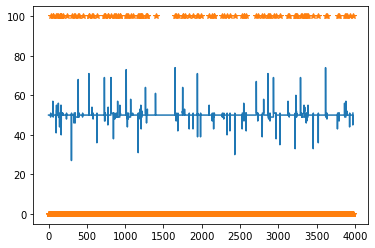

In [32]:
plt.plot(sizes)
plt.plot(np.array(code)*100,'*')

## Evaluation with results

In [33]:
evalfolders = [
    f"{BASE_DIR}/output/evaluator",
    f"{BASE_DIR}/output-bw-300-3000/evaluator",
    f"{BASE_DIR}/output-bw-300-1000/evaluator"
]

In [34]:
evaluator_files_dict_list = []
for idx, neo_files_bw in enumerate(neo_files):
    evaluator_files_dict_bw =[]
    for neo_files_resolution in neo_files_bw:
        evaluator_files_dict_list_resolution=[]
        for neo_file in neo_files_resolution: 
            file_dict = get_evaluation_files(evalfolders[idx],sourcefile=neo_file) 
            evaluator_files_dict_list_resolution += [file_dict]
        evaluator_files_dict_bw += [evaluator_files_dict_list_resolution]
    evaluator_files_dict_list+= [evaluator_files_dict_bw]

Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-04_12-19.h5
[PosixPath('/mnt/Archivos/data/output/evaluator/threshold_recordings_subset_50th_12_5uV_20000Hz_2021-10-14_23-46.h5'), PosixPath('/mnt/Archivos/data/output/evaluator/threshold_normalized_subset_50th_12_5uV_20000Hz_2021-10-14_23-47.h5'), PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-10-14_23-47.h5')]
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-04_12-20.h5
[PosixPath('/mnt/Archivos/data/output/evaluator/threshold_recordings_subset_50th_12_25uV_20000Hz_2021-10-14_23-47.h5'), PosixPath('/mnt/Archivos/data/output/evaluator/threshold_normalized_subset_50th_12_25uV_20000Hz_2021-10-14_23-48.h5'), PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_50th_12_25uV_20000Hz_2021-10-14_23-48.h5')]
Sear

Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-bw-300-3000/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-11-09_19-49.h5
[PosixPath('/mnt/Archivos/data/output-bw-300-3000/evaluator/threshold_recordings_subset_50th_12_5uV_20000Hz_2021-11-11_12-33.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-3000/evaluator/threshold_normalized_subset_50th_12_5uV_20000Hz_2021-11-11_12-33.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-3000/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-11-11_12-33.h5')]
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-bw-300-3000/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-11-09_19-49.h5
[PosixPath('/mnt/Archivos/data/output-bw-300-3000/evaluator/threshold_recordings_subset_50th_12_25uV_20000Hz_2021-11-11_12-33.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-3000/evaluator/threshold_normalized_subset_50th_12_25uV_20000Hz_2021-11-11_12-33.h5'), PosixPath('/mnt/Archivos/data/ou

Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-bw-300-1000/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-11-09_19-53.h5
[PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_recordings_subset_50th_12_5uV_20000Hz_2021-11-11_12-46.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_normalized_subset_50th_12_5uV_20000Hz_2021-11-11_12-46.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-11-11_12-46.h5')]
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-bw-300-1000/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-11-09_19-53.h5
[PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_recordings_subset_50th_12_25uV_20000Hz_2021-11-11_12-47.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_normalized_subset_50th_12_25uV_20000Hz_2021-11-11_12-47.h5'), PosixPath('/mnt/Archivos/data/ou

Filename found 3 files with source /mnt/Archivos/data/output-bw-300-1000/preprocessor/preprocessed_neo_6_25uV_20000Hz_2021-11-09_19-57.h5
[PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_recordings_subset_50th_6_25uV_20000Hz_2021-11-11_12-58.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_normalized_subset_50th_6_25uV_20000Hz_2021-11-11_12-58.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_neo_subset_50th_6_25uV_20000Hz_2021-11-11_12-59.h5')]
Search for pattern: *
Filename found 3 files with source /mnt/Archivos/data/output-bw-300-1000/preprocessor/preprocessed_neo_6_50uV_20000Hz_2021-11-09_19-57.h5
[PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_recordings_subset_50th_6_50uV_20000Hz_2021-11-11_12-59.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_normalized_subset_50th_6_50uV_20000Hz_2021-11-11_12-59.h5'), PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluato

In [58]:
from eapprocessor.process import get_results_evaluation_dataset_array
from eapprocessor.evaluator.spikes import convert_to_roc_list, convert_to_roc, convert_to_accuracy
from eapprocessor.plot.evaluator import plot_roc_list, plot_accuracy_list
from eapprocessor.tools.load import load_converted_values, load_neo, \
    load_count_evaluation, load_indexes, load_channels

In [36]:
evaluator_files_neo = [evaluator_files_dict[0][0]["neo_file"]
                       for evaluator_files_dict in evaluator_files_dict_list]

In [37]:
evaluator_files_neo

[PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-10-14_23-47.h5'),
 PosixPath('/mnt/Archivos/data/output-bw-300-3000/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-11-11_12-33.h5'),
 PosixPath('/mnt/Archivos/data/output-bw-300-1000/evaluator/threshold_neo_subset_50th_12_5uV_20000Hz_2021-11-11_12-46.h5')]

In [38]:
indexes_result = np.array(load_indexes(evaluator_files_neo[0]))

In [39]:
indexes_result.shape

(4, 3, 50, 200000)

Taking one threshold level

In [40]:
selected_indexes = indexes_result[0][1][2]

In [41]:
selected_indexes

array([1., 0., 0., ..., 0., 0., 0.])

In [42]:
n_slices= np.array(n_slices)
code = np.array(code)

In [43]:
n_slices[code>0]

array([[  1399,   1449],
       [  2857,   2907],
       [  3107,   3157],
       [  4999,   5049],
       [  5261,   5311],
       [  6468,   6518],
       [  7249,   7299],
       [  7735,   7785],
       [  7983,   8033],
       [  8199,   8249],
       [  8290,   8340],
       [  9258,   9308],
       [ 11757,  11807],
       [ 14985,  15035],
       [ 16632,  16682],
       [ 17443,  17493],
       [ 19375,  19425],
       [ 20014,  20064],
       [ 22214,  22264],
       [ 26386,  26436],
       [ 26555,  26605],
       [ 28410,  28460],
       [ 29159,  29209],
       [ 31596,  31646],
       [ 36516,  36566],
       [ 36946,  36996],
       [ 37046,  37096],
       [ 38792,  38842],
       [ 38950,  39000],
       [ 40820,  40870],
       [ 42439,  42489],
       [ 43288,  43338],
       [ 44368,  44418],
       [ 45162,  45212],
       [ 46591,  46641],
       [ 46893,  46943],
       [ 50767,  50817],
       [ 51512,  51562],
       [ 52141,  52191],
       [ 53622,  53672],


In [44]:
tp = np.array([np.sum(selected_indexes[np.arange(sl[0],sl[1]+1)]) for sl in n_slices[code>0]])

In [45]:
tp

array([ 4.,  5.,  4.,  6.,  3.,  2.,  3.,  6.,  4.,  7.,  5.,  3.,  8.,
        6.,  3.,  3.,  4.,  6.,  5.,  9.,  6.,  8.,  5.,  9.,  6., 15.,
        3.,  7.,  2.,  4.,  3.,  4.,  4.,  6.,  5.,  3.,  6.,  2.,  6.,
        3.,  3.,  4.,  7.,  3.,  8.,  5.,  3.,  5.,  6.,  6.,  3.,  7.,
        2.,  5.,  3.,  5.,  6.,  4.,  1.,  4.,  4., 10.,  2.,  3.,  4.,
        4.,  5.,  5.,  5.,  4.,  8.,  8.,  5.,  4.,  1.,  9.,  8.,  5.,
        5.,  6.,  5.,  6.,  6.,  3., 14.,  7.,  5.,  6.,  5.,  4.,  5.,
        6.,  3.,  3.,  6.,  4.,  3.,  4.,  3.,  7.,  5.,  3.,  4.,  3.,
        3.,  8.,  5.,  4.,  5.])

In [46]:
fp = np.array([np.sum(selected_indexes[np.arange(sl[0],sl[1]+1)]) for sl in n_slices[code==0]])

In [47]:
fp

array([1., 0., 6., ..., 0., 0., 0.])

In [48]:
tpr = np.sum(tp>0)/len(tp)
tpr

1.0

In [49]:
fpr = np.sum(fp>0)/len(fp)
fpr

0.22483829236739974

In [50]:
def get_results(selected_indexes,n_slices,code):
    tp = np.array([np.sum(selected_indexes[np.arange(sl[0],sl[1]+1)]) for sl in n_slices[code>0]])
    fp = np.array([np.sum(selected_indexes[np.arange(sl[0],sl[1]+1)]) for sl in n_slices[code==0]])
    tp = np.sum(tp>0)
    fp = np.sum(fp>0)
    fn = len(n_slices[code>0]) -tp
    tn = len(n_slices[code==0]) -fp
    
    return {
        "truepositive":tp,
        "falsepositive":fp,
        "falsenegative":fn,
        "truenegative":tn,
    }

In [79]:
get_results(selected_indexes,n_slices,code)

{'truepositive': 109,
 'falsepositive': 869,
 'falsenegative': 0,
 'truenegative': 2996}

In [77]:
#testing implemented function
from eapprocessor.evaluator.spikes import comparison_detection_spiketrain

In [80]:
comparison_detection_spiketrain(indexes_list[7],selected_indexes,N_samples)

{'truepositive': 109,
 'falsepositive': 877,
 'falsenegative': 0,
 'truenegative': 3013}

In [52]:
len(n_slices[code>0])

109

In [53]:
results= [get_results(selected_indexes,n_slices,code) for selected_indexes in indexes_result[0][1]]
results

[{'truepositive': 109,
  'falsepositive': 3865,
  'falsenegative': 0,
  'truenegative': 0},
 {'truepositive': 109,
  'falsepositive': 3169,
  'falsenegative': 0,
  'truenegative': 696},
 {'truepositive': 109,
  'falsepositive': 869,
  'falsenegative': 0,
  'truenegative': 2996},
 {'truepositive': 109,
  'falsepositive': 410,
  'falsenegative': 0,
  'truenegative': 3455},
 {'truepositive': 103,
  'falsepositive': 329,
  'falsenegative': 6,
  'truenegative': 3536},
 {'truepositive': 87,
  'falsepositive': 273,
  'falsenegative': 22,
  'truenegative': 3592},
 {'truepositive': 66,
  'falsepositive': 225,
  'falsenegative': 43,
  'truenegative': 3640},
 {'truepositive': 52,
  'falsepositive': 187,
  'falsenegative': 57,
  'truenegative': 3678},
 {'truepositive': 35,
  'falsepositive': 165,
  'falsenegative': 74,
  'truenegative': 3700},
 {'truepositive': 23,
  'falsepositive': 147,
  'falsenegative': 86,
  'truenegative': 3718},
 {'truepositive': 17,
  'falsepositive': 133,
  'falsenegative

In [54]:
tpr, fpr = convert_to_roc(results)

In [60]:
from eapprocessor.plot.evaluator import plot_roc, plot_accuracy

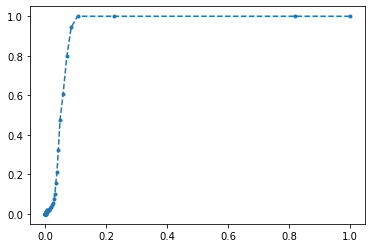

In [56]:
plot_roc(fpr,tpr,label="NEO w=1")

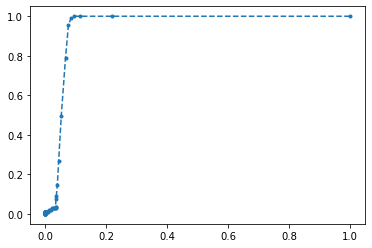

In [57]:
results= [get_results(selected_indexes,n_slices,code) for selected_indexes in indexes_result[3][1]]
tpr, fpr = convert_to_roc(results)
plot_roc(fpr,tpr,label="NEO w=4")

In [63]:
accuracy = convert_to_accuracy(results)
accuracy

array([0.02742828, 0.11366006, 0.19926874, 0.23290598, 0.24770642,
       0.25870647, 0.23561644, 0.17363344, 0.10431655, 0.06130268,
       0.04016064, 0.03319502, 0.01659751, 0.0167364 , 0.01260504,
       0.01271186, 0.01293103, 0.01363636, 0.01449275, 0.01546392,
       0.01092896, 0.01156069, 0.01290323, 0.00680272, 0.00735294,
       0.00763359, 0.00813008, 0.00833333, 0.00862069, 0.00877193,
       0.00892857, 0.00892857, 0.00900901, 0.00900901, 0.00900901,
       0.00900901, 0.00900901, 0.00900901, 0.00900901, 0.00909091,
       0.00909091, 0.00909091, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

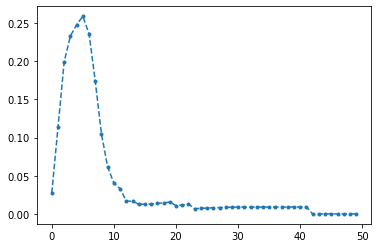

In [64]:
plot_accuracy(range(len(accuracy)),accuracy,label="NEO w=4")